#### Задача 1
С помощью средств языка Python сгенерируйте граф в модели Бакли-Остгуса $H_{a,m}^n$ на $n=5000$ вершинах при $m=2$ и $a=0.27$. В полученном графе посчитайте ассортативность и постройте график величины $d_{nn}$

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pylab
import numpy as np
%matplotlib inline


def generateSimpleBuckleyOsthusGraph(a, n):
    G = nx.MultiDiGraph()
    G.add_node(0)
    G.add_edge(0, 0)
    while G.number_of_nodes() < n:
        new_node = G.number_of_nodes()
        G.add_node(new_node)
        probabilities = [(a - 1 + nx.degree(G, i)) / ((a + 1.0) * new_node + a ) for i in xrange(new_node)]
        probabilities += [float(a) / ((a + 1.0) * new_node + a)]
        destination = np.random.choice(G.nodes(), 1, p=probabilities)[0]
        G.add_edge(new_node, destination)
    return G

def generateBuckleyOsthusGraph(a, n, m):
    G1mn = generateSimpleBuckleyOsthusGraph(a, m * n)
    G = nx.MultiDiGraph()
    for u, v in G1mn.edges():
        u_new, v_new = u / m, v / m
        G.add_edge(u_new, v_new)
    return G


In [3]:
H = generateBuckleyOsthusGraph(0.27, 5000, 2)

Величина $X(d_1,d_2)$ определяется как общее число ребер между вершинами суммарных степеней $d_1$ и $d_2$ в $G$.

Ассортативность:
$$
d_{nn}(d)=\frac{\sum\limits_{d_1}d_1X(d_1,d)}{\sum\limits_{d_1}X(d_1,d)}.
$$

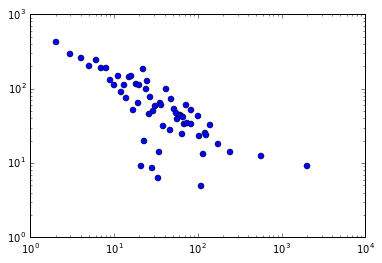

In [4]:
from collections import defaultdict
def get_X(G):
    result = defaultdict(int)
    for u, v in G.edges():
        result[(G.degree(u), G.degree(v))] += 1
        result[(G.degree(v), G.degree(u))] += 1
    return result
            
degrees = set(H.degree().values())
X = get_X(H)
degs = []
assorts = []
for d in sorted(degrees):
    dnn = float(sum(d1 * X[(d1, d)] for d1 in degrees)) / sum(X[(d1, d)] for d1 in degrees)
    degs.append(d)
    assorts.append(dnn)
plt.loglog(degs, assorts, ls='None', marker='o')
plt.show()
